21BAI1217

Mainak Chattopadhyay

PAT 5

SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/forestfires.csv')

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Write the program to print the feature values, all the columns except the last column

In [ ]:
numCol = len(df.columns)
numCol

13

In [ ]:
df.columns[:12]

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df
le=LabelEncoder()
col=['month','day']
for i in col:
  df_encoded[i]=le.fit_transform(df_encoded[i])

Print the target values, last column of the data frame

In [ ]:
df['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [ ]:
df['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

Print the transformed x to a matrix form

In [ ]:
X = df[df.columns[:len(df.columns)-1]]
Y = df[df.columns[-1]]


In [ ]:
#calculate the scaling
m = X.size
zero_mean = np.ones_like(X)
data_mean = 1/m * np.sum(X, axis = 0)
X_zero_mean = X - data_mean

# calculate the normalization
#Calculate standard deviation
v = 1/m *  np.sum(X_zero_mean, axis = 0)
X = X_zero_mean/v
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,18.534609,14.131763,14.823098,-1.090909,11.358099,2.002575,1.162025,6.309460,4.592002,13.983904,20.740298,-1.090909
1,18.534609,11.087229,21.643387,22.824285,11.993547,3.088837,14.894649,8.631144,11.383773,8.663382,1.841641,-1.090909
2,18.534609,11.087229,21.643387,8.475169,11.993547,4.068833,15.319911,8.631144,9.027444,8.663382,3.144997,-1.090909
3,21.338254,17.176297,14.823098,-1.090909,12.152409,2.840886,0.760654,11.968565,4.661305,27.580795,11.942647,119.766234
4,21.338254,17.176297,14.823098,13.258208,11.805801,4.966180,1.350765,12.839197,6.809723,28.171964,4.774191,-1.090909
...,...,...,...,...,...,...,...,...,...,...,...,...
512,10.123673,8.042694,1.182521,13.258208,10.693767,5.603768,14.811030,1.666091,18.175544,8.367797,7.706741,-1.090909
513,4.516382,11.087229,1.182521,13.258208,10.693767,5.603768,14.811030,1.666091,14.086620,19.895596,17.807748,-1.090909
514,18.534609,11.087229,1.182521,13.258208,10.693767,5.603768,14.811030,1.666091,13.601494,19.600011,20.740298,-1.090909
515,1.712736,11.087229,1.182521,8.475169,12.542343,16.147590,13.594971,15.305986,16.650861,11.323643,11.942647,-1.090909


Write a code to split data to 60%(training) & 40%(to be splitted to test, validation)
splitting the 40%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.6)

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(310, 12)
(310,)
(103, 12)
(103,)
(104, 12)
(104,)


(None, None)

Write a code to plotting all of the dataset


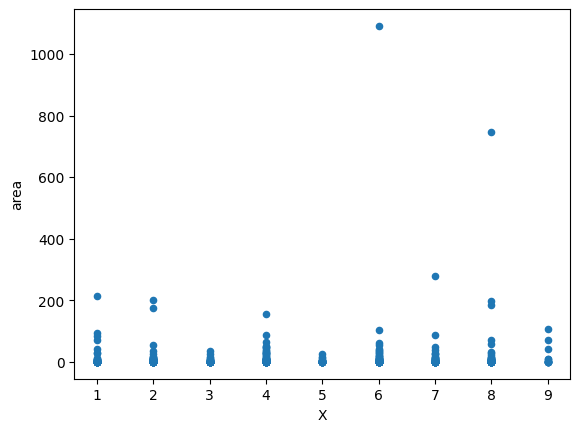

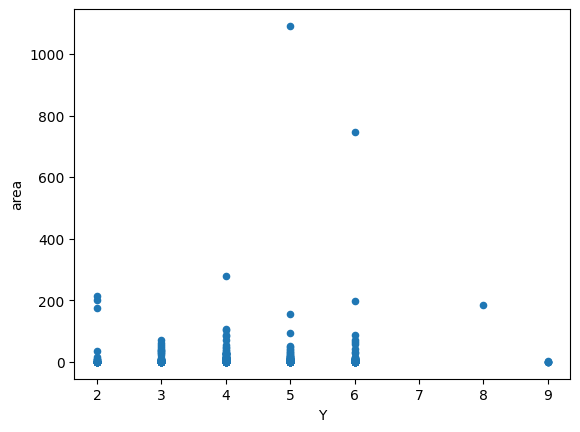

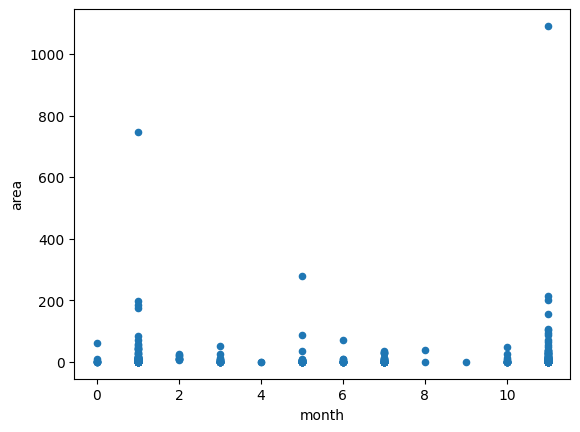

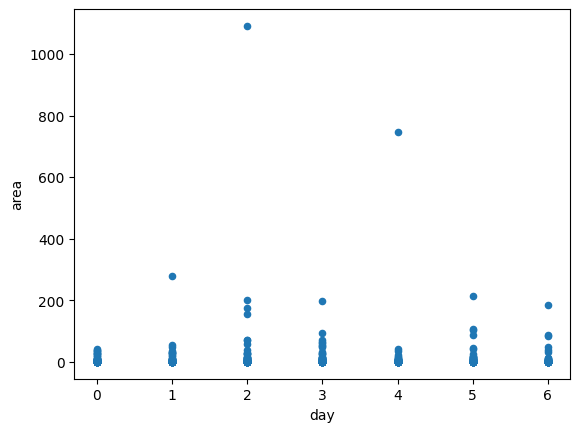

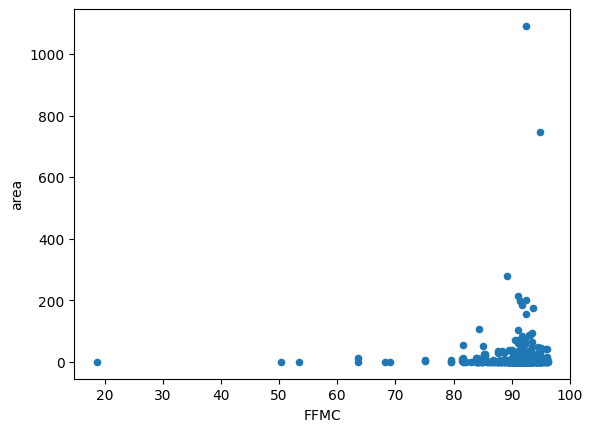

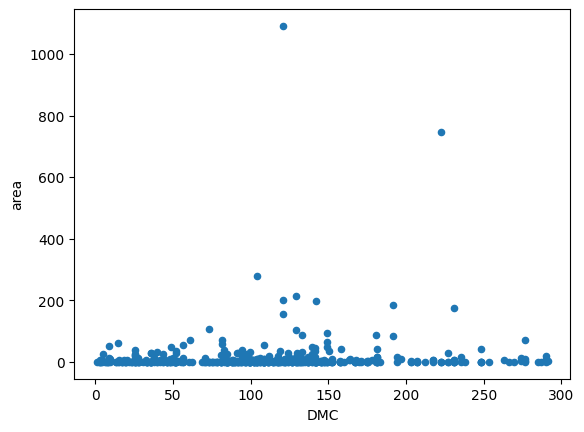

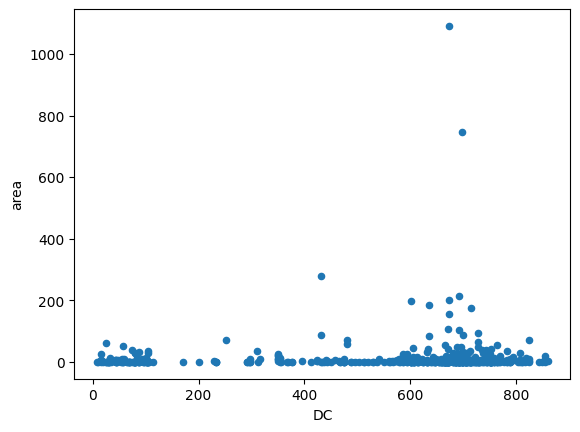

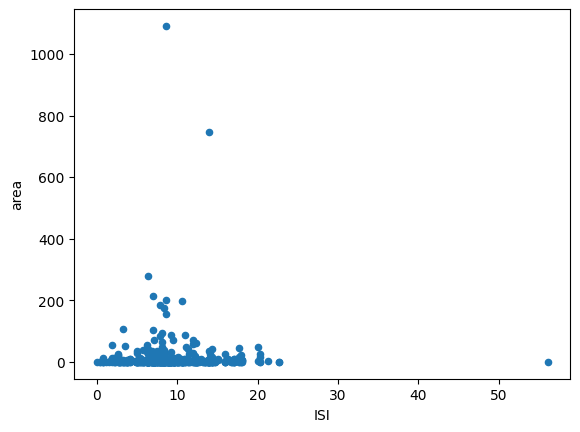

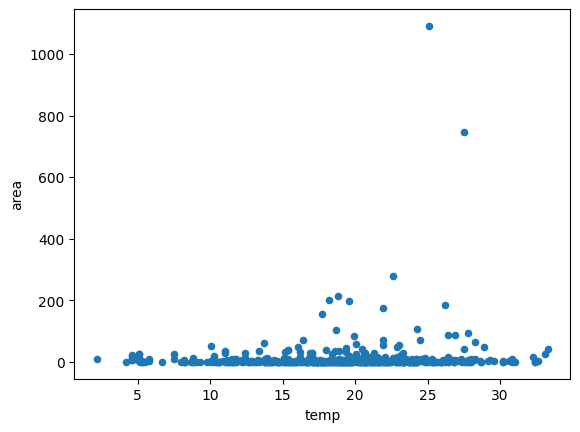

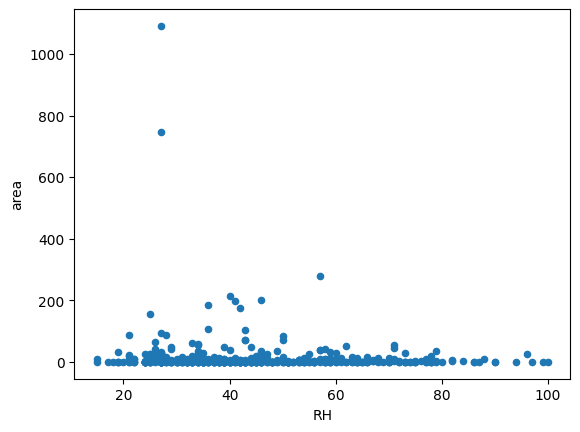

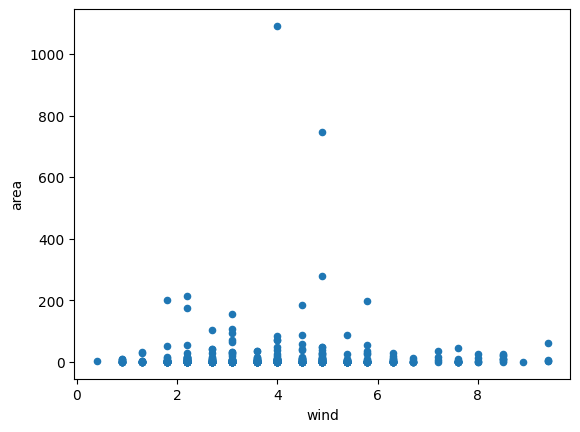

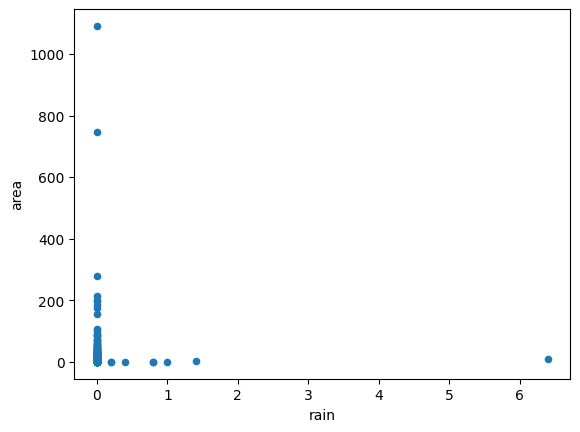

In [ ]:
import matplotlib.pyplot as plt
for col in X:
  df.plot(kind='scatter',x=col,y='area')
  plt.show()
  print(" ")

Write a code to plotting training data

<Axes: >

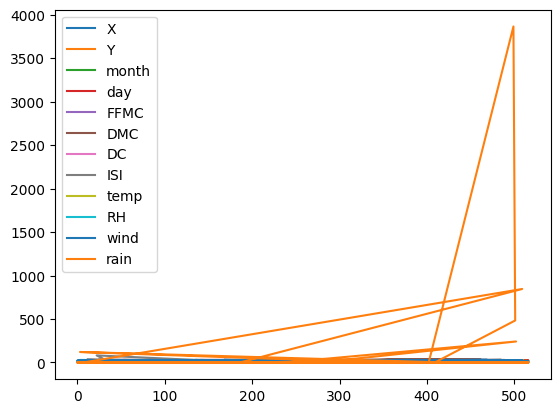

In [ ]:
X_train.plot()

Write a code to plotting validation data

<Axes: >

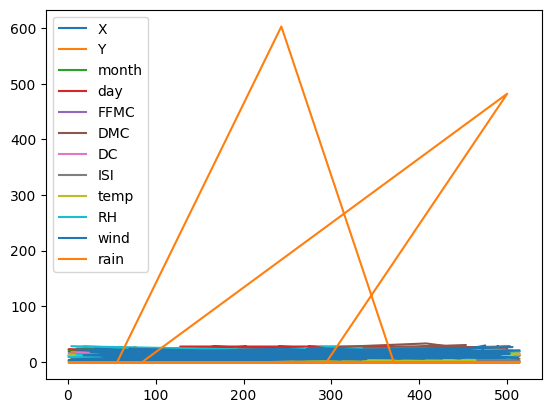

In [ ]:
X_valid.plot()

Write a code to plotting testing data

<Axes: >

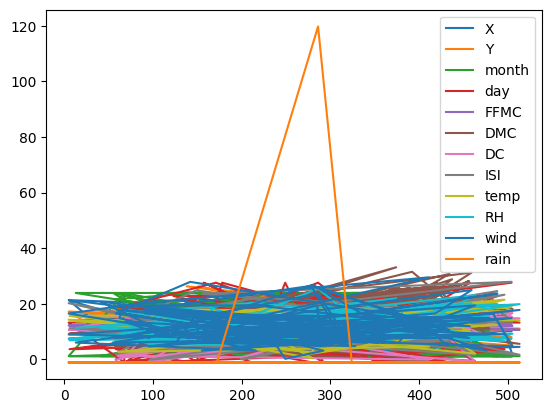

In [ ]:
X_test.plot()

Write a code to finding the best value for C value for linear SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import svm
from sklearn import preprocessing
clf = svm.SVC(kernel='linear')

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

clf.fit(X_train, y_transformed)
y_pred = clf.predict(X_test).round()


In [ ]:
C_values = [ 0.1, 1, 10, 1000,10000]
mse_scores = []
for C in C_values:
    svr = SVR(kernel='linear', C=C)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
best_C = C_values[np.argmin(mse_scores)]
print("Best value for C:", best_C)

Best value for C: 10000


Write a code to SVM classifier with linear kernal for training data

In [ ]:
svm = SVR(kernel = 'linear',C=best_C)
svm.fit(X_train,y_train)

SVR(C=10000, kernel='linear')

In [ ]:
y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)
y_pred_val = svr.predict(X_valid)

In [ ]:
#Confusion matrix for testing data (linear kernel)
y_pred_discrete = np.digitize(y_pred_test, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_test_discrete = np.digitize(y_test, bins=[0,5,10,15,20,25,30,35,40, np.inf])
# Compute the confusion matrix on the testing set
cm_test = confusion_matrix(y_test_discrete, y_pred_discrete)
print("Confusion matrix for testing data:\n", cm_test)


Confusion matrix for testing data:
 [[ 0  0  0  0  0  0  0  0  0]
 [ 4 54 13  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0]
 [ 0  8  3  0  0  0  0  0  0]]


In [ ]:
# Confusion matrix for training data (linear kernel)
y_pred_discrete = np.digitize(y_pred_train, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_train_discrete = np.digitize(y_train, bins=[0,5,10,15,20,25,30,35,40, np.inf])
# Compute the confusion matrix on the testing
setcm_test = confusion_matrix(y_train_discrete, y_pred_discrete)
print("Confusion matrix for testing data:\n", cm_test)

Confusion matrix for testing data:
 [[ 0  0  0  0  0  0  0  0  0]
 [ 4 54 13  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0]
 [ 0  8  3  0  0  0  0  0  0]]


In [ ]:
# Confusion matrix for cross-validation (linear kernel)
y_pred_discrete = np.digitize(y_pred_val, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_val_discrete = np.digitize(y_valid, bins=[0,5,10,15,20,25,30,35,40, np.inf])
cm_test = confusion_matrix(y_val_discrete, y_pred_discrete)
print("Confusion matrix for testing data:\n", cm_test)

Confusion matrix for testing data:
 [[ 0  0  0  0  0  0  0  0]
 [ 7 54 14  0  0  0  0  0]
 [ 0  9  1  0  0  0  0  0]
 [ 0  6  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0]
 [ 0  3  1  0  0  0  0  0]]


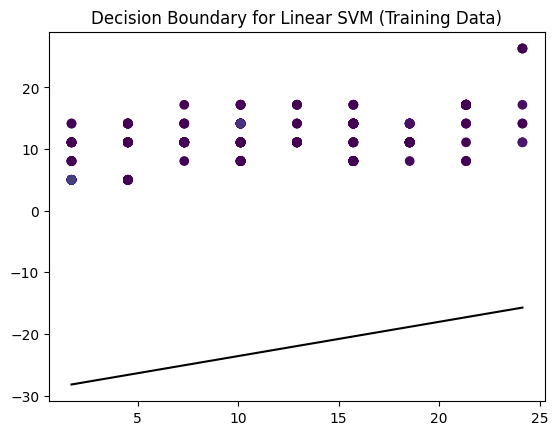

In [ ]:
# Finding the decision boundary for the linear SVM (training data)
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X_train.iloc[:,0]), np.max(X_train.iloc[:,0]),100)
yy = a * xx - (svm.intercept_[0]) / w[1]
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
plt.plot(xx, yy,'k-')
plt.title('Decision Boundary for Linear SVM (Training Data)')
plt.show()

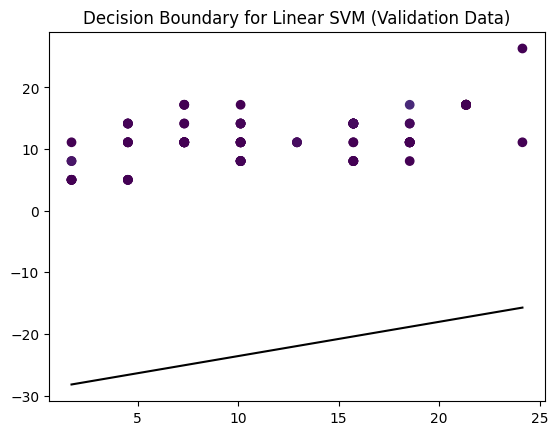

In [ ]:
# Finding the decision boundary for the linear SVM (validation data)
plt.scatter(X_valid.iloc[:,0], X_valid.iloc[:,1], c=y_valid)
plt.plot(xx, yy,'k-')
plt.title('Decision Boundary for Linear SVM (Validation Data)')
plt.show()

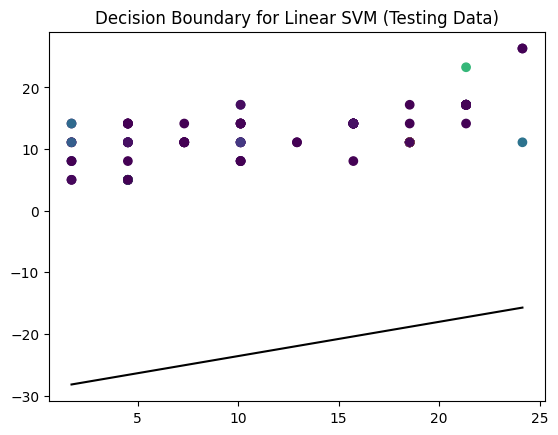

In [ ]:
# Finding the decision boundary for the linear SVM (testing data)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)
plt.plot(xx, yy,'k-')
plt.title('Decision Boundary for Linear SVM (Testing Data)')
plt.show()

In [ ]:
# Metrics for training dataset - linear kernel
y_pred_train = svm.predict(X_train)
y_pred_discrete = np.digitize(y_pred_train, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_train_discrete = np.digitize(y_train, bins=[0,5,10,15,20,25,30,35,40, np.inf])
acc_train = accuracy_score(y_train_discrete, y_pred_discrete)
print("Accuracy:", acc_train)

Accuracy: 0.5483870967741935


In [ ]:
# Metrics for validation dataset - linear kernel
y_pred_val = svm.predict(X_valid)
y_pred_discrete = np.digitize(y_pred_val, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_val_discrete = np.digitize(y_valid, bins=[0,5,10,15,20,25,30,35,40, np.inf])
acc_val = accuracy_score(y_val_discrete, y_pred_discrete)
print("\nMetrics for validation dataset:\nAccuracy:", acc_val)



Metrics for validation dataset:
Accuracy: 0.5339805825242718


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid search for finding best values for C and gamma; depending on F1 score
C_range = [0.001,0.01,0.1,1,10,100]
gamma_range = [0.001,0.01,0.1,1,10,100]
param_grid = {'C': C_range,'gamma': gamma_range}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

Best parameters: {'C': 0.001, 'gamma': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

In [ ]:
# SVM classifier with Gaussian kernel rbf
svm_rbf = SVR(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_rbf.fit(X_train, y_train)

SVR(C=0.001, gamma=0.001)

In [ ]:
# Confusion matrix for testing, training, and validation data (rbf kernel)
y_pred_train_rbf = svm_rbf.predict(X_train)
y_pred_discrete = np.digitize(y_pred_train_rbf, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_train_discrete = np.digitize(y_train, bins=[0,5,10,15,20,25,30,35,40, np.inf])
cm_train_rbf = confusion_matrix(y_train_discrete, y_pred_discrete)
print("Confusion matrix for training data (rbf kernel):\n", cm_train_rbf)

Confusion matrix for training data (rbf kernel):
 [[220   0   0   0   0   0   0   0   0]
 [ 36   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0]]


In [ ]:
y_pred_val_rbf = svm_rbf.predict(X_valid)
y_pred_discrete = np.digitize(y_pred_val_rbf, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_val_discrete = np.digitize(y_valid, bins=[0,5,10,15,20,25,30,35,40, np.inf])
cm_val_rbf = confusion_matrix(y_val_discrete, y_pred_discrete)
print("Confusion matrix for validation data (rbf kernel):\n", cm_val_rbf)

Confusion matrix for validation data (rbf kernel):
 [[75  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]]


In [ ]:
y_pred_test_rbf = svm_rbf.predict(X_test)
y_pred_discrete = np.digitize(y_pred_test_rbf, bins=[0,5,10,15,20,25,30,35,40, np.inf])
y_test_discrete = np.digitize(y_test, bins=[0,5,10,15,20,25,30,35,40, np.inf])
cm_test_rbf = confusion_matrix(y_test_discrete, y_pred_discrete)
print("Confusion matrix for testing data (rbf kernel):\n", cm_test_rbf)

Confusion matrix for testing data (rbf kernel):
 [[71  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0]]


In [ ]:
# Building the model with testing, training, and validation data
X_all = np.concatenate((X_train, X_valid, X_test), axis=0)
y_all = np.concatenate((y_train, y_valid, y_test), axis=0)
svm_final = SVR(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_final.fit(X_all, y_all)

SVR(C=0.001, gamma=0.001)